In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

from utility import plot_settings
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

In [22]:
df = pd.read_pickle('../../data/interim/YearlySalary_model_p1.pkl')
df.head()

,Age,Country,CurrentJob,EdLevel,Industry,OSProffesional,RemoteWork,WorkedLanguage,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer
0,25-34 years old,United States of America,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,iOS;iPadOS;MacOS,"Hybrid (some remote, some in-person)",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"156,000.00",12.00,7.00,0,1
1,25-34 years old,Philippines,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Other (Please Specify):,Remote,HTML/CSS;JavaScript;TypeScript,"23,456.00",6.00,4.00,1,1
2,35-44 years old,United Kingdom of Great Britain and Northern I...,"Developer, back-end",Some college/university study without earning ...,Other,MacOS,Remote,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"96,828.00",21.00,21.00,1,1
3,35-44 years old,United States of America,"Developer, full-stack",Some college/university study without earning ...,Technology,MacOS,Remote,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,"135,000.00",4.00,3.00,1,1
4,25-34 years old,United States of America,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Financial Services,MacOS;Ubuntu;Windows,Remote,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,"80,000.00",5.00,3.00,1,1


In [54]:
for i in df.columns:
    print(df[i].nunique())


8
171
33
8
8
1622
3
17180
8174
51
51
2
2


In [24]:
df['Country'].unique()

array(['United States of America', 'Philippines',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France',
       'Albania', 'Nigeria', 'Spain', 'South Africa', 'Brazil',
       'Portugal', 'Italy', 'Bangladesh', 'Canada', 'Argentina',
       'Switzerland', 'Sri Lanka', 'Lithuania', 'Serbia', 'Cyprus',
       'India', 'Latvia', 'Russian Federation', 'Greece', 'Austria',
       'Norway', 'Singapore', 'Turkey', 'Croatia', 'Poland',
       'Iran, Islamic Republic of...', 'Kosovo', 'Nepal', 'Slovenia',
       'China', 'Belgium', 'Romania', 'Denmark', 'Hungary',
       'Republic of Korea', 'Viet Nam', 'Israel', 'Ukraine', 'Nomadic',
       'Dominican Republic', 'Isle of Man', 'Estonia', 'Morocco', 'Egypt',
       'The former Yugoslav Republic of Macedonia', 'Uzbekistan',
       'Luxembourg', 'Indonesia', 'Ireland', 'Georgia', 'Benin', 'Japan',
       'Venezuela, Bolivarian Republic of...', 'Bahrain', 'Tajikis

I asked ChatGPT to create a new column to classify the countries by region. The average salary is very similar I think, let's visualize it:

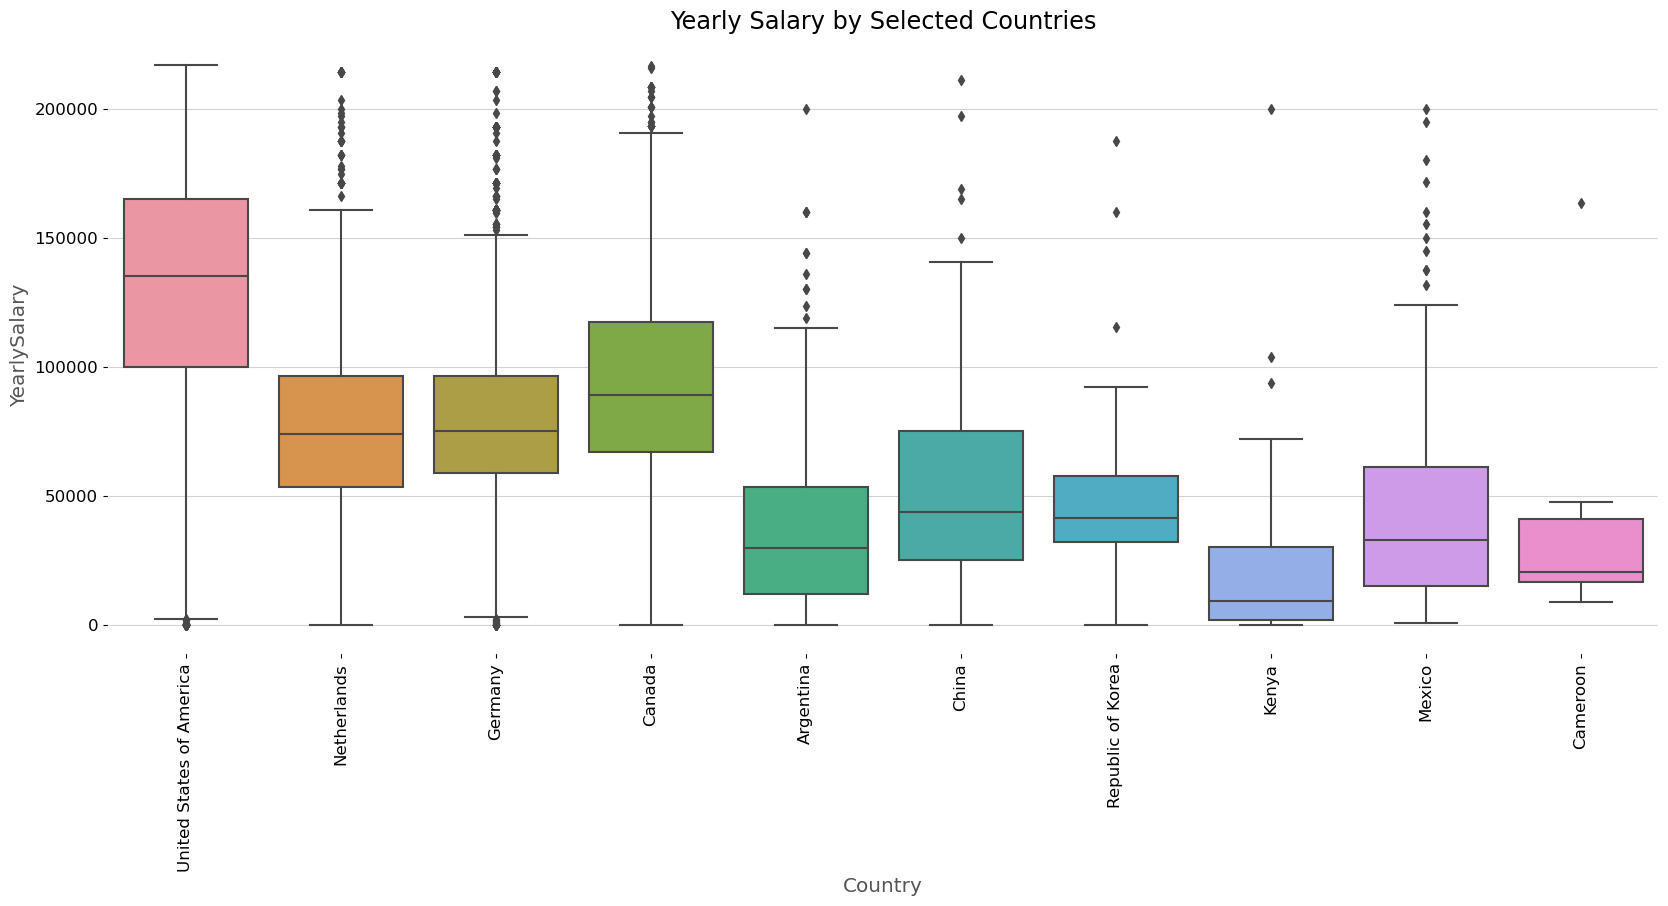

In [25]:
selected_countries = [
    'Mexico', 'Argentina', 'United States of America', 'Canada','Germany',
    'Netherlands','China','Republic of Korea','Kenya','Cameroon']
sel_countries_df =  df.query('Country in @selected_countries')
plt.figure(figsize=(20,8))
sns.boxplot(data=sel_countries_df, x='Country', y='YearlySalary')
plt.xticks(rotation=90)
plt.title('Yearly Salary by Selected Countries')
plt.show()

The income is really similar on average, except USA compared with Canada, but anyways, I will group them by region.  
Wow, ChatGPT gave me all the regions for each country, this was my prompt:  
> Act like an expert in python and pandas. I have a list with different countries, and I want to classifiy them by region, because I dont want too much unique values. Can you provide me the code?? These are the countries "array(['United States of America', 'Philippines'...  
> I dont want to do it manually. Give me the dictionary to map countries by region, and use a lambda function to create a new column with the region.

In [37]:
country_to_region = {
    'United States of America': 'North America',
    'Mexico': 'South America',
    'Canada': 'North America',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'Finland': 'Europe',
    'Australia': 'Oceania',
    'Netherlands': 'Europe',
    'Germany': 'Europe',
    'Sweden': 'Europe',
    'France': 'Europe',
    'Albania': 'Europe',
    'Nigeria': 'Africa',
    'Spain': 'Europe',
    'South Africa': 'Africa',
    'Brazil': 'South America',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Bangladesh': 'South Asia',
    'Argentina': 'South America',
    'Switzerland': 'Europe',
    'Sri Lanka': 'South Asia',
    'Lithuania': 'Europe',
    'Serbia': 'Europe',
    'Cyprus': 'Europe',
    'India': 'South Asia',
    'Latvia': 'Europe',
    'Russian Federation': 'Europe',
    'Greece': 'Europe',
    'Austria': 'Europe',
    'Norway': 'Europe',
    'Singapore': 'Asia',
    'Turkey': 'Asia',
    'Croatia': 'Europe',
    'Poland': 'Europe',
    'Iran, Islamic Republic of...': 'Asia',
    'Kosovo': 'Europe',
    'Nepal': 'South Asia',
    'Slovenia': 'Europe',
    'China': 'Asia',
    'Belgium': 'Europe',
    'Romania': 'Europe',
    'Denmark': 'Europe',
    'Hungary': 'Europe',
    'Republic of Korea': 'Asia',
    'Viet Nam': 'Asia',
    'Israel': 'Asia',
    'Ukraine': 'Europe',
    'Nomadic': 'Other',
    'Dominican Republic': 'South America',
    'Isle of Man': 'Europe',
    'Estonia': 'Europe',
    'Morocco': 'Africa',
    'Egypt': 'Africa',
    'The former Yugoslav Republic of Macedonia': 'Europe',
    'Uzbekistan': 'Asia',
    'Luxembourg': 'Europe',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Georgia': 'Europe',
    'Benin': 'Africa',
    'Japan': 'Asia',
    'Venezuela, Bolivarian Republic of...': 'South America',
    'Bahrain': 'Asia',
    'Tajikistan': 'Asia',
    'Czech Republic': 'Europe',
    'Malta': 'Europe',
    'Belarus': 'Europe',
    'Oman': 'Asia',
    'Montenegro': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Zimbabwe': 'Africa',
    'Armenia': 'Europe',
    'Malaysia': 'Asia',
    'Saudi Arabia': 'Asia',
    'Tunisia': 'Africa',
    'Kenya': 'Africa',
    'United Arab Emirates': 'Asia',
    'Afghanistan': 'Asia',
    'Pakistan': 'South Asia',
    'Djibouti': 'Africa',
    'Ethiopia': 'Africa',
    'Paraguay': 'South America',
    'New Zealand': 'Oceania',
    'Panama': 'South America',
    'Zambia': 'Africa',
    'Nicaragua': 'South America',
    'Jordan': 'Asia',
    'Slovakia': 'Europe',
    'Bulgaria': 'Europe',
    'Uruguay': 'South America',
    'Peru': 'South America',
    'Trinidad and Tobago': 'South America',
    'Hong Kong (S.A.R.)': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Colombia': 'South America',
    'Mexico': 'South America',
    'Republic of Moldova': 'Europe',
    'Guatemala': 'South America',
    'Mongolia': 'Asia',
    'El Salvador': 'South America',
    'Chile': 'South America',
    'Cuba': 'South America',
    'Kazakhstan': 'Asia',
    'Azerbaijan': 'Asia',
    'Bolivia': 'South America',
    'Iceland': 'Europe',
    'Algeria': 'Africa',
    'Syrian Arab Republic': 'Asia',
    'Somalia': 'Africa',
    'Jamaica': 'South America',
    "Côte d'Ivoire": 'Africa',
    'Myanmar': 'South Asia',
    'Honduras': 'South America',
    'Yemen': 'Asia',
    'Iraq': 'Asia',
    'Qatar': 'Asia',
    "Lao People's Democratic Republic": 'Asia',
    'Costa Rica': 'South America',
    'Lebanon': 'Asia',
    'South Korea': 'Asia',
    'Ghana': 'Africa',
    'Fiji': 'Oceania',
    'Taiwan': 'Asia',
    'Mauritius': 'Africa',
    'Maldives': 'Asia',
    'Kuwait': 'Asia',
    'Cambodia': 'Asia',
    'Brunei Darussalam': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Turkmenistan': 'Asia',
    'Uganda': 'Africa',
    'Andorra': 'Europe',
    'Palestine': 'Asia',
    'Madagascar': 'Africa',
    'United Republic of Tanzania': 'Africa',
    'Cameroon': 'Africa',
    'Mozambique': 'Africa',
    'Barbados': 'South America',
    'Gabon': 'Africa',
    'Mali': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Palau': 'Oceania',
    'Malawi': 'Africa',
    'Belize': 'South America',
    'Togo': 'Africa',
    'Guyana': 'South America',
    'Angola': 'Africa',
    'Sierra Leone': 'Africa',
    'Namibia': 'Africa',
    'Botswana': 'Africa',
    'Rwanda': 'Africa',
    'Mauritania': 'Africa',
    'Philippines': 'South Asia',
    'Saint Lucia': 'South America',
    'Monaco': 'Europe',
    'Swaziland': 'Africa',
    'Lesotho': 'Africa',
    'Niger': 'Africa',
    'Dominica': 'South America',
    'Liechtenstein': 'Europe',
    'Saint Kitts and Nevis': 'South America',
    'Suriname': 'South America',
    'Senegal': 'Africa',
    'Burundi': 'Africa',
    'Cape Verde': 'Africa',
    'Sudan': 'Africa',
    'Guinea': 'Africa',
    'Saint Vincent and the Grenadines': 'South America',
    'Libyan Arab Jamahiriya': 'Africa',
    'Burkina Faso': 'Africa',
    'Antigua and Barbuda': 'South America'
}
df2 = df.copy()
df2['Region'] = df2['Country'].apply(lambda x: country_to_region.get(x, 'Other'))

In [38]:
df2.head()

,Age,Country,CurrentJob,EdLevel,Industry,OSProffesional,RemoteWork,WorkedLanguage,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer,Region
0,25-34 years old,United States of America,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,iOS;iPadOS;MacOS,"Hybrid (some remote, some in-person)",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,"156,000.00",12.00,7.00,0,1,North America
1,25-34 years old,Philippines,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Other (Please Specify):,Remote,HTML/CSS;JavaScript;TypeScript,"23,456.00",6.00,4.00,1,1,South Asia
2,35-44 years old,United Kingdom of Great Britain and Northern I...,"Developer, back-end",Some college/university study without earning ...,Other,MacOS,Remote,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"96,828.00",21.00,21.00,1,1,Europe
3,35-44 years old,United States of America,"Developer, full-stack",Some college/university study without earning ...,Technology,MacOS,Remote,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,"135,000.00",4.00,3.00,1,1,North America
4,25-34 years old,United States of America,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Financial Services,MacOS;Ubuntu;Windows,Remote,Go;HTML/CSS;JavaScript;Python;Rust;SQL;TypeScript,"80,000.00",5.00,3.00,1,1,North America


(array([0, 1]), [Text(0, 0, 'United States of America'), Text(1, 0, 'Canada')])

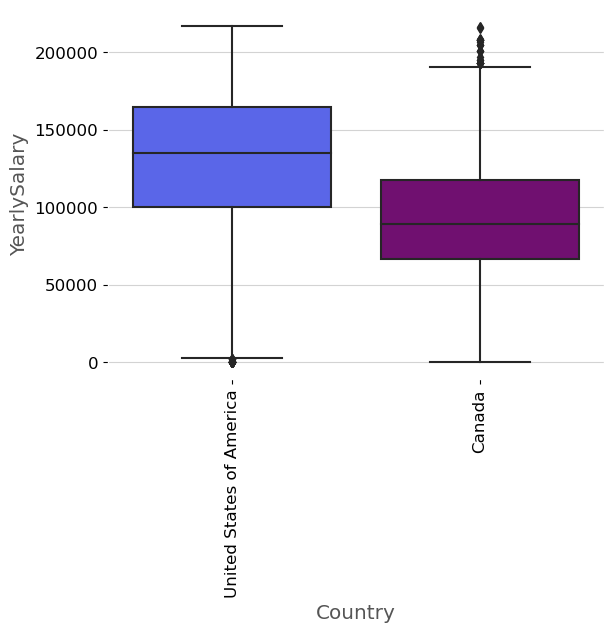

In [39]:
north_america = df2.query('Region == "North America"')
sns.boxplot(data=north_america, x='Country', y='YearlySalary')
plt.xticks(rotation=90)

I counted all countries outside Canada and USA, part of South America, cuz the purpose is to group them by their average salary, and, these countries and these countries were going to skew salaries

In [44]:
df2.groupby('Region')['YearlySalary'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,895.00,"30,324.36","33,435.76",1.00,"5,850.50","18,000.00","45,519.50","200,000.00"
Asia,"2,649.00","54,076.55","47,606.23",1.00,"14,102.00","41,934.00","83,000.00","215,048.00"
Europe,"22,707.00","70,765.38","37,973.80",1.00,"45,306.00","64,254.00","89,955.00","216,532.00"
North America,"11,569.00","126,522.23","45,630.21",1.00,"92,000.00","126,000.00","160,000.00","216,822.00"
Oceania,"1,565.00","92,930.59","36,632.10",93.00,"66,104.00","88,018.00","115,682.00","214,838.00"
South America,"2,755.00","39,475.58","35,264.28",2.00,"14,201.00","30,000.00","53,559.00","216,000.00"
South Asia,"2,509.00","23,298.24","25,235.06",1.00,"6,058.00","15,619.00","30,292.00","214,179.00"


In [42]:
df2.query("Region == 'Other'").head(2)

,Age,Country,CurrentJob,EdLevel,Industry,OSProffesional,RemoteWork,WorkedLanguage,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer,Region
167,25-34 years old,Nomadic,Other (please specify):,Some college/university study without earning ...,Not_Responded,Debian;Other Linux-based;Windows;Windows Subsy...,"Hybrid (some remote, some in-person)",Ada;C;C++;Go;Java;Lua;Prolog,"2,142.00",14.00,14.00,0,1,Other
550,25-34 years old,Nomadic,"Engineer, data","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Retail,Windows;Windows Subsystem for Linux (WSL),In-person,Bash/Shell (all shells);HTML/CSS;JavaScript;Py...,"10,000.00",8.00,3.00,0,0,Other


In [43]:
df2.drop(df2.query("Region == 'Other'").index, inplace=True)

In [46]:
df2.loc[df2['CurrentJob'].str.contains('Data scientist')].shape

(904, 14)

In [45]:
df2.loc[df2['CurrentJob'].str.contains('Data')].shape

(1468, 14)

In [51]:
top_jobs = df2['CurrentJob'].value_counts().nlargest(10).index
top_jobs

Index(['Developer, full-stack', 'Developer, back-end', 'Developer, front-end',
       'Developer, desktop or enterprise applications', 'Developer, mobile',
       'Other (please specify):',
       'Developer, embedded applications or devices', 'Engineering manager',
       'DevOps specialist', 'Data scientist or machine learning specialist'],
      dtype='object', name='CurrentJob')

In [52]:
df2['CurrentJob'] = df2['CurrentJob'].apply(lambda x: 'Other (please specify):' if x not in top_jobs else x)

In [53]:
df2['CurrentJob'].value_counts()

CurrentJob
Developer, full-stack                            16260
Developer, back-end                               8860
Other (please specify):                           8417
Developer, front-end                              3140
Developer, desktop or enterprise applications     2303
Developer, mobile                                 1555
Developer, embedded applications or devices       1184
Engineering manager                               1108
DevOps specialist                                  918
Data scientist or machine learning specialist      904
Name: count, dtype: int64

In [139]:
df3 = df2.copy()

In [140]:
df3['MacOS'] = df2['OSProffesional'].apply(lambda x: 1 if 'MacOS' in x or 'iOS' in x or 'iPadOS' in x else 0)
df3['Linux'] = df2['OSProffesional'].apply(lambda x: 1 if 'Linux' in x or 'Fedora' in x or 'Debian' in x or 'Ubuntu' in x or 'Other Linux-based' in x else 0)
df3['Windows'] = df2['OSProffesional'].apply(lambda x: 1 if 'Windows' in x else 0)

# Our Operating Systems
sistemas_conocidos = ['MacOS', 'iOS', 'iPadOS', 'Linux', 'Fedora', 'Debian', 'Ubuntu', 'Other Linux-based', 'Windows','Windows Subsystem for Linux (WSL)']

# Function to check other OS
def check_other_os(os_list):
    os_list = os_list.split(';')
    for os in os_list:
        if os not in sistemas_conocidos:
            return 1
    return 0

df3['Other_OS'] = df3['OSProffesional'].apply(check_other_os)


In [141]:
df3.query('Other_OS == 1').head()

,Age,Country,CurrentJob,EdLevel,Industry,OSProffesional,RemoteWork,WorkedLanguage,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer,Region,MacOS,Linux,Windows,Other_OS
1,25-34 years old,Philippines,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Other (Please Specify):,Remote,HTML/CSS;JavaScript;TypeScript,"23,456.00",6.00,4.00,1,1,South Asia,0,0,0,1
7,25-34 years old,United States of America,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Arch;Debian;Ubuntu,Remote,Bash/Shell (all shells);Elixir;HTML/CSS;JavaSc...,"75,000.00",10.00,9.00,0,1,North America,0,1,0,1
43,18-24 years old,Netherlands,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Arch;Debian,In-person,HTML/CSS;JavaScript;PHP;Python;Rust;SQL,"38,552.00",10.00,2.00,0,1,Europe,0,1,0,1
49,35-44 years old,Latvia,"Developer, front-end","Associate degree (A.A., A.S., etc.)",Technology,Android;iOS;iPadOS;MacOS;Windows,"Hybrid (some remote, some in-person)",C#;HTML/CSS;JavaScript;Swift,"53,545.00",18.00,15.00,1,1,Europe,1,0,1,1
54,45-54 years old,United States of America,Other (please specify):,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Not_Responded,MacOS;Red Hat;Windows;Other (Please Specify):,Remote,Groovy;HTML/CSS;Java;JavaScript;SQL,"140,000.00",29.00,24.00,0,1,North America,1,0,1,1


In [142]:
df['WorkedLanguage'].value_counts()

WorkedLanguage
HTML/CSS;JavaScript;TypeScript                                                                    892
Python                                                                                            455
HTML/CSS;JavaScript;PHP;SQL                                                                       411
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                             407
JavaScript;TypeScript                                                                             381
                                                                                                 ... 
Bash/Shell (all shells);C;C++;Go;HTML/CSS;Java;Lisp;Python;SQL                                      1
C#;HTML/CSS;Lua;MATLAB;Python;R;SQL                                                                 1
Assembly;Bash/Shell (all shells);C;Fortran;HTML/CSS;Java;JavaScript;PHP;Python                      1
Bash/Shell (all shells);C#;HTML/CSS;JavaScript;PHP;Ruby;SQL        

As we observed in our 'Exploratory_Analisis/4_TopLanguages_OverYeats.ipynb' notebook, the top languages are: 

In [143]:
# List of the top languages
languages_to_check = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'TypeScript', 'Bash/Shell (all shells)', 'Ruby']

# Iterate through the list of languages and create a new column for each
for language in languages_to_check:
    df3[language] = df3['WorkedLanguage'].apply(lambda x: 1 if language in x else 0) 

In [144]:
def check_other_language(lang_list):
    lang_list = lang_list.split(';')  # Si los lenguajes están separados por ';'
    for lang in lang_list:
        if lang not in languages_to_check:
            return 1
    return 0

# Aplicar la función lambda a la columna 'Languages' para crear la columna 'Other_Language'
df3['Other_Language'] = df['WorkedLanguage'].apply(check_other_language)

In [145]:
df3.sample(5)

,Age,Country,CurrentJob,EdLevel,Industry,OSProffesional,RemoteWork,WorkedLanguage,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer,Region,MacOS,Linux,Windows,Other_OS,JavaScript,HTML/CSS,SQL,Python,TypeScript,Bash/Shell (all shells),Ruby,Other_Language
32215,35-44 years old,Netherlands,Data scientist or machine learning specialist,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Retail,MacOS,"Hybrid (some remote, some in-person)",Python;SQL,"177,769.00",14.00,10.00,0,0,Europe,1,0,0,0,0,0,1,1,0,0,0,0
29659,25-34 years old,Thailand,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Technology,iOS;MacOS;Ubuntu,"Hybrid (some remote, some in-person)",Elixir;Go;JavaScript;TypeScript,"1,015.00",11.00,7.00,1,1,Asia,1,1,0,0,1,0,0,0,1,0,0,1
34189,35-44 years old,Spain,"Developer, full-stack",Some college/university study without earning ...,Not_Responded,Debian;Windows;Windows Subsystem for Linux (WSL),Remote,C;C#;HTML/CSS;JavaScript;PowerShell;SQL;TypeSc...,"58,899.00",37.00,24.00,0,1,Europe,0,1,1,0,1,1,1,0,1,0,0,1
44109,25-34 years old,Israel,Engineering manager,Some college/university study without earning ...,Not_Responded,MacOS;Ubuntu;Windows Subsystem for Linux (WSL),"Hybrid (some remote, some in-person)",Bash/Shell (all shells);C;C++;HTML/CSS;JavaScr...,"80,184.00",13.00,10.00,1,1,Asia,1,1,1,0,1,1,1,1,1,1,0,1
23301,25-34 years old,United Kingdom of Great Britain and Northern I...,"Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,Android;MacOS,Remote,Bash/Shell (all shells);Java;Kotlin;Objective-...,"99,311.00",17.00,10.00,0,1,Europe,1,0,0,1,0,0,1,0,0,1,1,1


In [146]:
df3.loc[23301,'WorkedLanguage']

'Bash/Shell (all shells);Java;Kotlin;Objective-C;Ruby;SQL;Swift'

In [148]:
df3.query('Other_Language == 0').head()

,Age,Country,CurrentJob,EdLevel,Industry,OSProffesional,RemoteWork,WorkedLanguage,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,Developer,Region,MacOS,Linux,Windows,Other_OS,JavaScript,HTML/CSS,SQL,Python,TypeScript,Bash/Shell (all shells),Ruby,Other_Language
1,25-34 years old,Philippines,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Other,Other (Please Specify):,Remote,HTML/CSS;JavaScript;TypeScript,"23,456.00",6.00,4.00,1,1,South Asia,0,0,0,1,1,1,0,0,1,0,0,0
2,35-44 years old,United Kingdom of Great Britain and Northern I...,"Developer, back-end",Some college/university study without earning ...,Other,MacOS,Remote,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,"96,828.00",21.00,21.00,1,1,Europe,1,0,0,0,1,1,1,0,1,1,1,0
11,35-44 years old,Sweden,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,MacOS,"Hybrid (some remote, some in-person)",JavaScript;TypeScript,"45,149.00",4.00,2.00,1,1,Europe,1,0,0,0,1,0,0,0,1,0,0,0
12,25-34 years old,France,"Developer, front-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Retail,MacOS,"Hybrid (some remote, some in-person)",HTML/CSS;JavaScript;SQL;TypeScript,"58,899.00",11.00,6.00,1,1,Europe,1,0,0,0,1,1,1,0,1,0,0,0
17,25-34 years old,Nigeria,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,MacOS,Remote,HTML/CSS;JavaScript;TypeScript,"120,000.00",8.00,6.00,1,1,Africa,1,0,0,0,1,1,0,0,1,0,0,0


In [149]:
df4 = df3.copy()

In [151]:
df4.drop(['Country','OSProffesional','WorkedLanguage'], axis='columns', inplace=True)

In [152]:
df4.nunique()

Age                           8
CurrentJob                   10
EdLevel                       8
Industry                      8
RemoteWork                    3
YearlySalary               8174
YearsCode                    51
YearsCodePro                 51
z_UsingAI                     2
Developer                     2
Region                        7
MacOS                         2
Linux                         2
Windows                       2
Other_OS                      2
JavaScript                    2
HTML/CSS                      2
SQL                           2
Python                        2
TypeScript                    2
Bash/Shell (all shells)       2
Ruby                          2
Other_Language                2
dtype: int64

In [153]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44649 entries, 0 to 44663
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      44649 non-null  object 
 1   CurrentJob               44649 non-null  object 
 2   EdLevel                  44649 non-null  object 
 3   Industry                 44649 non-null  object 
 4   RemoteWork               44649 non-null  object 
 5   YearlySalary             44649 non-null  float64
 6   YearsCode                44649 non-null  float64
 7   YearsCodePro             44649 non-null  float64
 8   z_UsingAI                44649 non-null  int64  
 9   Developer                44649 non-null  int64  
 10  Region                   44649 non-null  object 
 11  MacOS                    44649 non-null  int64  
 12  Linux                    44649 non-null  int64  
 13  Windows                  44649 non-null  int64  
 14  Other_OS                 44

I think our df is ready to be used in our model ;-;

In [154]:
df4.to_pickle('../../data/processed/YearlySalary_model_p2.pkl')